# Noble Identities, Filters

We would like to have a half band low pass filter. We would like to have a pass band from frequency 0 up to frequency π/ 2, a half band filter. If we want to use it for sampling rate conversion with a downsampling factor of 2, we actually need to make sure that the stop band starts at π/2.

We also need to create a transition band, for instance going from π/2 − 0.1 to π/2. This transition bandwidth is where we don't care about that value of our frequency response, and it is something that we can use to fine-tune the resulting filter. For instance if we see we don't get enough attenuation, we can increase the bandwidth of our transition band. 

This also means that our passband is given as between 0 and π/2 − 0.1. 

This is now our ideal, but what we can obtain is never exactly this ideal. We can only come close to it in some sense. That is why we need to define an <b>error measure</b> or an <b>error function</b>, which measures how close we come to the ideal, how “good” the filter is, and which we can use to obtain a design which minimizes this error function. 

Often used error functions are the mean squared error, the mean absolute error, the weighted mean squared error, or the minimax error function (which seeks to minimize the maximum deviation to the ideal). 

The weighted mean squared error uses weights to give errors in different frequency regions different importance. For instance, the error in the stop-band is often more important than in the pass-band, to obtain a high attenuation in the stop-band. An error of 0.1 in the passband might not be so bad, but an error of 0.1 in the stopband leads to only -20 dB attenuation, which is not very much. (we optimize in the linear domain and not in the dB domain). So in this case, we might assign a weight of 1 to the pass bands, and a weight of 1000 to the stop bands, to obtain higher stop band attenuations. 

The optimization usually results in the same or similar <b>weighted error</b> for all frequencies. For instance we get: errorstopband*1000=errorpassband*1, and hence errorstopband=errorpassband/1000. 

For FIR <b>linear phase filters</b>, Python has the specialized optimization in the function “remez” which implements the so-called Parks-McLellan algorithm, using the Chebyshev algorithm (see also the Book: Oppenheim, Schafer: “Discrete-Time Signal Processing”, Prentice Hall). 

This is now also an example of the <b>minimax error function</b>. The algorithm minimizes the maximum error in the pass band and the stop band (weighted in comparison between the two), which leads to a so-called equi-ripple behaviour (all ripples have the same hight in the same band, e.g. stop band or pass band) of the filter in the frequency domain. It is called in the form 
$$hmin=scipy.signal.remez(N,F,A,W)$$
where N is the length of the filter, F is the vector containing the band edges (now normalized to the Nyquist frequency as 0.5, hence between 0 and 0.5) of the pass band and stop band (the gap between them is the transition band). A is the desired amplitude vector for the specified bands, and W is the weight vector for the bands.

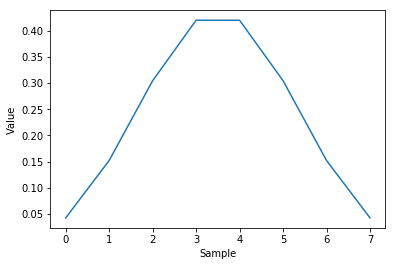

In [1]:
%matplotlib inline
import scipy.signal as sp
import matplotlib.pyplot as plt
N=8;
F = [0.0, 0.5/2 - 0.05, 0.5/2, 0.5]
A = [1.0, 0.0]
W = [1, 100]
hmin = sp.remez(N, F, A, weight=W)
plt.plot(hmin)
plt.xlabel('Sample')
plt.ylabel('Value')

Now we obtain a nice impulse response or set of coefficients hmin and its frequencies response is:

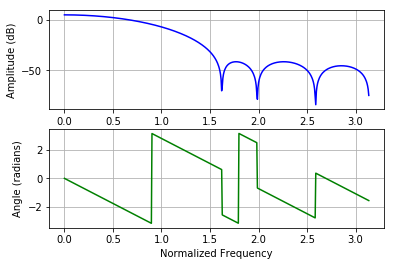

In [2]:
from freqz import freqz
freqz(hmin)

Here we see that we obtain about -40 dB of stop band attenuation, which roughly corresponds to our weight of 100 for the stop band.